In [1]:
import numpy as np
import matplotlib.pyplot as plt
from moirepy import BilayerMoireLattice, HexagonalLayer

In [2]:
# Parameters for a ~9.43 degree twist
params = {
    "latticetype": HexagonalLayer,
    "ll1": 3, "ll2": 4, "ul1": 4, "ul2": 3,
    "n1": 1, "n2": 1
}  # yes, u can do this in python

# 1. Open Boundary Conditions (Finite Flake)
lattice_obc = BilayerMoireLattice(**params, pbc=False)

# 2. Periodic Boundary Conditions (Infinite Bulk)
lattice_pbc = BilayerMoireLattice(**params, pbc=True)

twist angle = 0.1646 rad (9.4300 deg)
74 cells in upper lattice
74 cells in lower lattice
twist angle = 0.1646 rad (9.4300 deg)
74 cells in upper lattice
74 cells in lower lattice


In [3]:
# Generate Hamiltonians with identical hopping parameters
ham_obc = lattice_obc.generate_hamiltonian(tll=1.0, tuu=1.0, tul=0.1, tlu=0.1)
ham_pbc = lattice_pbc.generate_hamiltonian(tll=1.0, tuu=1.0, tul=0.1, tlu=0.1)

print(f"OBC Non-zero entries: {ham_obc.nnz}")
print(f"PBC Non-zero entries: {ham_pbc.nnz}")

OBC Non-zero entries: 6062
PBC Non-zero entries: 9728


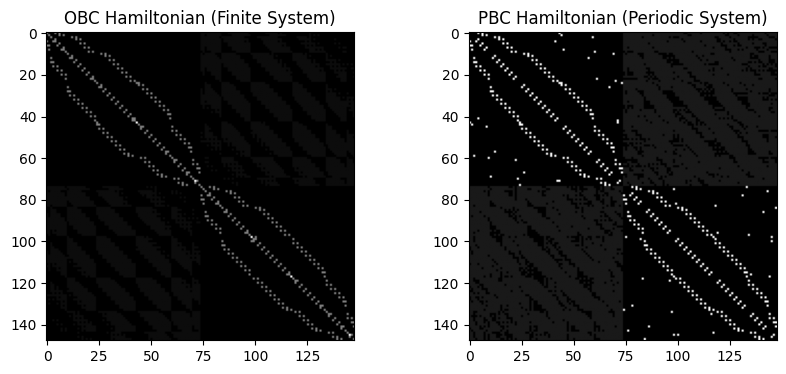

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

im0 = axes[0].imshow(ham_obc.toarray(), cmap="gray")
axes[0].set_title("OBC Hamiltonian (Finite System)")

im1 = axes[1].imshow(ham_pbc.toarray(), cmap="gray")
axes[1].set_title("PBC Hamiltonian (Periodic System)")

# Single shared colorbar
# fig.colorbar(im1, ax=axes.ravel().tolist())
# fig.colorbar(im1, ax=axes.ravel().tolist())

plt.savefig("1.webp", format='webp', dpi=300, bbox_inches='tight', pil_kwargs={'lossless': True})

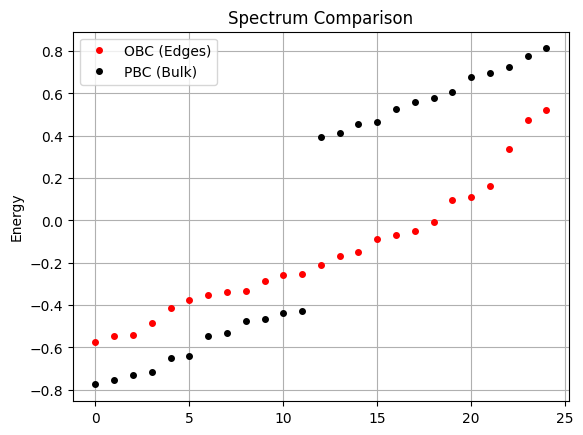

In [5]:
from scipy.sparse.linalg import eigsh

def get_spectrum(ham):
    # Get 100 eigenvalues near zero energy
    vals = eigsh(ham, k=25, which='LM', sigma=0, return_eigenvectors=False)
    return np.sort(vals)

spec_obc = get_spectrum(ham_obc)
spec_pbc = get_spectrum(ham_pbc)

plt.plot(spec_obc, 'ro', label='OBC (Edges)', markersize=4)
plt.plot(spec_pbc, 'ko', label='PBC (Bulk)', markersize=4)
plt.legend()
plt.ylabel("Energy")
plt.title("Spectrum Comparison")
plt.grid()
plt.savefig("2.webp", format='webp', dpi=300, bbox_inches='tight', pil_kwargs={'lossless': True})